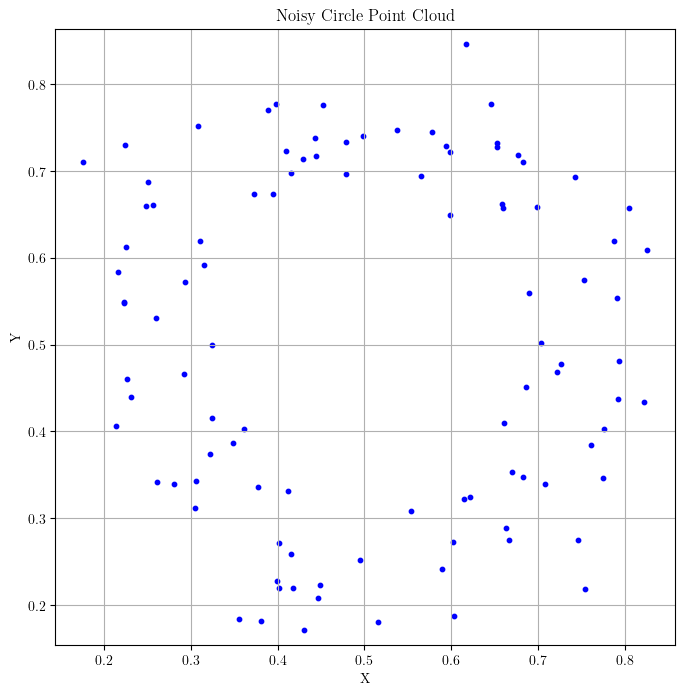

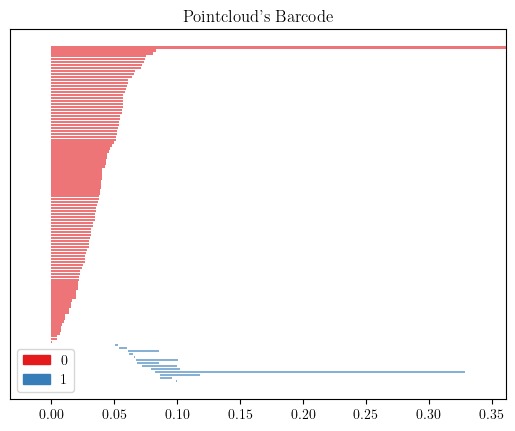

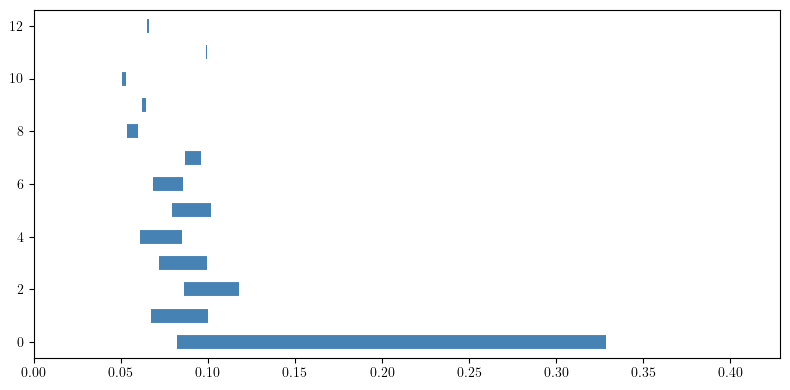

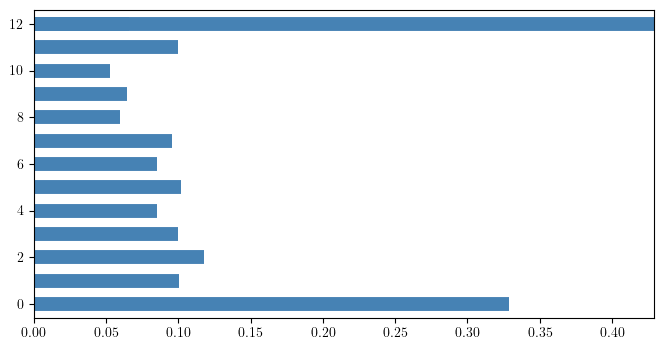

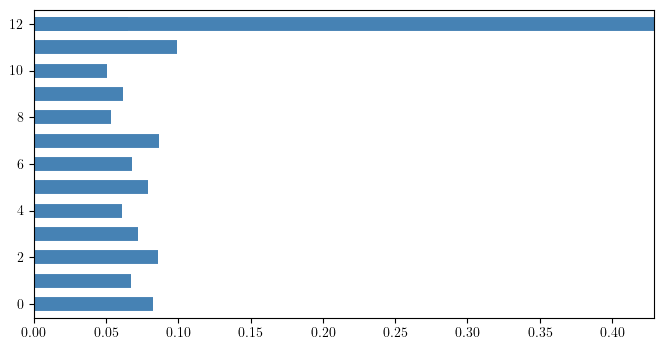

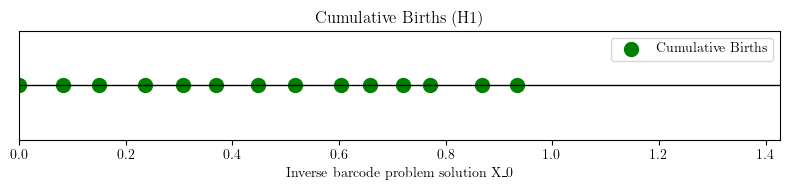

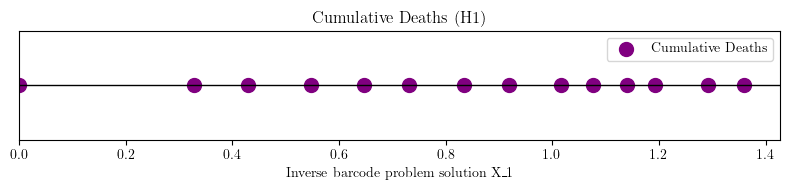

Inverse barcode problem solution X_0 [0.         0.08231514 0.14959482 0.23581218 0.30803434 0.36900613
 0.44846321 0.51686192 0.60364243 0.65742649 0.71956152 0.77038877
 0.86928074 0.93469511]
Inverse barcode problem solution X_1: [0.         0.32863348 0.42900004 0.54690613 0.64673519 0.73201159
 0.83406104 0.91972856 1.01563425 1.07561804 1.14025847 1.19312963
 1.29295719 1.35908684]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi import RipsComplex
import numpy as np
import matplotlib.pyplot as plt


# Parameters
radius = 0.25
center = np.array([0.5, 0.5])
num_points = 100  # Total number of points
noise_level = 0.05  # Amount of noise to add

# Generate points on a perfect circle
angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
x = center[0] + radius * np.cos(angles)
y = center[1] + radius * np.sin(angles)
perfect_circle = np.column_stack((x, y))

# Add Gaussian noise to make it a noisy circle
noisy_circle = perfect_circle + np.random.normal(scale=noise_level, size=(num_points, 2))

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(noisy_circle[:, 0], noisy_circle[:, 1], s=10, c='blue')
plt.title('Noisy Circle Point Cloud')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio equal
plt.show()

# Crear complejo de Rips
rips_complex = gd.RipsComplex(points=noisy_circle, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular persistencia
simplex_tree.compute_persistence()

# Graficar el barcode de persistencia
gd.plot_persistence_barcode(simplex_tree.persistence())
plt.title("Pointcloud's Barcode")
plt.show()
# Extraer los pares de nacimiento y muerte de la persistencia
persistence = simplex_tree.persistence()

finite_deaths = [death for (dim, (birth, death)) in persistence if np.isfinite(death)]
max_filtration = max(finite_deaths) + 0.1 if finite_deaths else 0.5


# Extraer características de dimensión 1 (ciclos)
dim_1_pairs = [pair[1] for pair in persistence if pair[0] == 1]
bd_array = np.array(dim_1_pairs)

# Graficar solo la barcode de dimensión 1 (horizontal)
plt.figure(figsize=(8, 4))
for i, (birth, death) in enumerate(bd_array):
    plt.hlines(y=i, xmin=birth, xmax=death, color='steelblue', linewidth=10)
plt.xlim(0, max_filtration)
plt.tight_layout()
plt.show()

# Graficar solo la barcode de dimensión 1 (horizontal)
plt.figure(figsize=(8, 4))
plt.hlines(y=12, xmin=0, xmax=70, color='steelblue', linewidth=10)
for i, (birth, death) in enumerate(bd_array):
    # Start the bars at 0 instead of 'birth'
    plt.xlim(0, max_filtration)
    plt.hlines(y=i, xmin=0, xmax=death, color='steelblue', linewidth=10)
plt.figure(figsize=(8, 4))
plt.hlines(y=12, xmin=0, xmax=70, color='steelblue', linewidth=10)
for i, (birth, death) in enumerate(bd_array):
    # Start the bars at 0 instead of 'birth'
    plt.xlim(0, max_filtration)
    plt.hlines(y=i, xmin=0, xmax=birth, color='steelblue', linewidth=10)
    
# Cálculo de suma acumulativa de birth y death de los ciclos H1
if dim_1_pairs:
    births = [birth for (birth, death) in dim_1_pairs]
    deaths = [death if np.isfinite(death) else max_filtration for (birth, death) in dim_1_pairs]

    # Añadir el 0 al principio
    births = [0] + births
    deaths = [0] + deaths

    # Sumas acumulativas
    cumulative_births = np.cumsum(births)
    cumulative_deaths = np.cumsum(deaths)

    # Puntos 2D para graficar como una línea real 1D
    birth_points_2d = np.array([[x, 0] for x in cumulative_births])
    death_points_2d = np.array([[x, 0] for x in cumulative_deaths])

    # Definir límites comunes para el eje X
    x_max = max(cumulative_births[-1], cumulative_deaths[-1])
    x_lim = (0, x_max * 1.05)  # Un pequeño margen a la derecha

    # Gráfico de puntos acumulados de birth
    plt.figure(figsize=(8, 2))
    plt.scatter(birth_points_2d[:, 0], birth_points_2d[:, 1], color='green', s=100, label='Cumulative Births')
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([])
    plt.xlim(x_lim)
    plt.xlabel("Inverse barcode problem solution X_0")
    plt.title("Cumulative Births (H1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico de puntos acumulados de death
    plt.figure(figsize=(8, 2))
    plt.scatter(death_points_2d[:, 0], death_points_2d[:, 1], color='purple', s=100, label='Cumulative Deaths')
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([])
    plt.xlim(x_lim)
    plt.xlabel("Inverse barcode problem solution X_1")
    plt.title("Cumulative Deaths (H1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Imprimir resultados
    print("Inverse barcode problem solution X_0", cumulative_births)
    print("Inverse barcode problem solution X_1:", cumulative_deaths)

